In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,  LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb
import catboost
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [15]:
# Load dataset
df = pd.read_csv("data.csv")

In [16]:
print(df.isnull().sum())

Location         0
Time             0
Hospital_Stay    0
MRI_Units        0
CT_Scanners      0
Hospital_Beds    0
dtype: int64


In [17]:
df.head()

Location  Time  Hospital_Stay  MRI_Units  CT_Scanners  Hospital_Beds
0      AUS  1992            6.6       1.43        16.71           1.43
1      AUS  1994            6.4       2.36        18.48           2.36
2      AUS  1995            6.5       2.89        20.55           2.89
3      AUS  1996            6.4       2.96        21.95           2.96
4      AUS  1997            6.2       3.53        23.34           3.53

In [18]:
df['Location'].unique()


array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'NLD', 'NZL',
       'POL', 'PRT', 'SVK', 'ESP', 'TUR', 'GBR', 'USA', 'EST', 'ISR',
       'RUS', 'SVN', 'ISL', 'LVA', 'LTU'], dtype=object)

In [19]:
df.dtypes

Location          object
Time               int64
Hospital_Stay    float64
MRI_Units        float64
CT_Scanners      float64
Hospital_Beds    float64
dtype: object

In [20]:
df.columns

Index(['Location', 'Time', 'Hospital_Stay', 'MRI_Units', 'CT_Scanners',
       'Hospital_Beds'],
      dtype='object')

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encoding categorical features
label_encoder = LabelEncoder()
# Apply label encoding to ordinal categorical features
df['Location'] = label_encoder.fit_transform(df['Location'])


df['Hospital_Stay'] = df['Hospital_Stay'].round().astype(int)
df['MRI_Units'] = df['MRI_Units'].round().astype(int)
df['CT_Scanners'] = df['CT_Scanners'].round().astype(int)
df['Hospital_Beds'] = df['Hospital_Beds'].round().astype(int)




# Display encoded DataFrame
print(df.head())

# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')


   Location  Time  Hospital_Stay  MRI_Units  CT_Scanners  Hospital_Beds
0         0  1992              7          1           17              1
1         0  1994              6          2           18              2
2         0  1995              6          3           21              3
3         0  1996              6          3           22              3
4         0  1997              6          4           23              4


['label_encoder.pkl']

In [22]:
df.head(3)

Location  Time  Hospital_Stay  MRI_Units  CT_Scanners  Hospital_Beds
0         0  1992              7          1           17              1
1         0  1994              6          2           18              2
2         0  1995              6          3           21              3

In [23]:
df.to_csv('encoded_data.csv', index=False)


In [24]:
df.dtypes

Location         int32
Time             int64
Hospital_Stay    int32
MRI_Units        int32
CT_Scanners      int32
Hospital_Beds    int32
dtype: object

In [25]:
corr = df.corr()
corr

Location      Time  Hospital_Stay  MRI_Units  CT_Scanners  \
Location       1.000000  0.143343       0.098661  -0.034717    -0.117474   
Time           0.143343  1.000000      -0.359348   0.478956     0.274411   
Hospital_Stay  0.098661 -0.359348       1.000000   0.064690     0.247743   
MRI_Units     -0.034717  0.478956       0.064690   1.000000     0.760144   
CT_Scanners   -0.117474  0.274411       0.247743   0.760144     1.000000   
Hospital_Beds -0.034717  0.478956       0.064690   1.000000     0.760144   

               Hospital_Beds  
Location           -0.034717  
Time                0.478956  
Hospital_Stay       0.064690  
MRI_Units           1.000000  
CT_Scanners         0.760144  
Hospital_Beds       1.000000

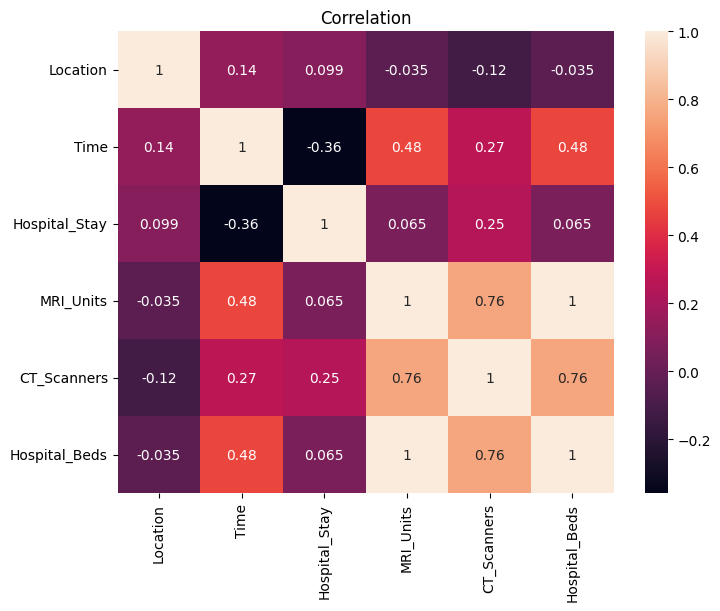

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example
plt.figure(figsize=(8, 6))  # Adjust width and height as needed
sns.heatmap(corr, annot=True)
plt.title('Correlation')
plt.show()


In [27]:
# Strip any leading/trailing spaces from the column names
df.columns = df.columns.str.strip()

X = df.drop(columns=["Hospital_Stay"])  # All columns except target
y = df["Hospital_Stay"]  # Target column


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [29]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Linear Regression:
Mean Squared Error: 4.203404748324535
R^2 Score: 0.23132855515619988


In [65]:
from sklearn.svm import SVR
# Initialize and train SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Support Vector Regressor (SVR):")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Support Vector Regressor (SVR):
Mean Squared Error: 3.143979079340534
R^2 Score: 0.425064421303075


In [69]:
from sklearn.tree import DecisionTreeRegressor
# Initialize and train Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Decision Tree Regressor:
Mean Squared Error: 0.875
R^2 Score: 0.8714409910888937


In [71]:
from sklearn.neighbors import KNeighborsRegressor
# Initialize and train KNN Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("K-Nearest Neighbors Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

K-Nearest Neighbors Regressor:
Mean Squared Error: 1.814615384615385
R^2 Score: 0.7333883938274288


In [72]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


# Initialize and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Ridge Regression:
Mean Squared Error: 5.565157562158143
R^2 Score: 0.18234155357120085


In [73]:
from sklearn.ensemble import AdaBoostRegressor
# Initialize and train AdaBoost Regressor model
base_model = DecisionTreeRegressor(max_depth=3)
ada_model = AdaBoostRegressor(base_model, n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = ada_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("AdaBoost Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

AdaBoost Regressor:
Mean Squared Error: 2.1658519834593224
R^2 Score: 0.681783103495218


In [74]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Initialize and train CatBoost Regressor model
catboost_model = CatBoostRegressor(iterations=100, depth=5, learning_rate=0.1, loss_function='RMSE', cat_features=[], verbose=0)
catboost_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = catboost_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("CatBoost Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


CatBoost Regressor:
Mean Squared Error: 0.5331080940583972
R^2 Score: 0.9216733163261298


In [75]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.05)
lgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("LightGBM Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 414, number of used features: 5
[LightGBM] [Info] Start training from score 7.222222
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Initialize and train ExtraTrees Regressor model
et_model = ExtraTreesRegressor(n_estimators=100)
et_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = et_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Extra Trees Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Extra Trees Regressor:
Mean Squared Error: 0.43417846153846157
R^2 Score: 0.9206023199445983


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize individual models
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
catboost_model = CatBoostRegressor(iterations=100, depth=5, learning_rate=0.1, loss_function='RMSE', cat_features=[], verbose=0)

# Initialize Voting Regressor
voting_regressor = VotingRegressor(estimators=[
   
    ('dt', dt_model),
    ('rf', rf_model),
    ('et', et_model),
    ('catboost', catboost_model)
])

# Train the Voting Regressor
voting_regressor.fit(X_train, y_train)

# Predictions and evaluation
y_pred = voting_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Voting Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Voting Regressor:
Mean Squared Error: 0.34059108993530696
R^2 Score: 0.949958796610244


In [91]:
# Save the models
joblib.dump(catboost_model, 'catboost_model.pkl')
joblib.dump(et_model, 'et_model.pkl')
joblib.dump(voting_regressor, 'voting_model.pkl')

['voting_model.pkl']